In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from pathlib import Path
import os

notebook_dir = Path().resolve()
os.chdir(notebook_dir)

In [17]:
from data_loading import standardise_month_jsons
standardise_month_jsons()

Written: C:\Users\jamed\Documents\EVEN_TASK\WasteOilTask\data\AUGUST_standardised.json
Written: C:\Users\jamed\Documents\EVEN_TASK\WasteOilTask\data\OCTOBER_standardised.json
Written: C:\Users\jamed\Documents\EVEN_TASK\WasteOilTask\data\NOVEMBER_standardised.json


In [18]:
from data_loading import load_month_data, generate_derived_features
import pandas as pd
data = load_month_data()
data_derived = generate_derived_features(data)

In [19]:
def print_col_stats(df, col):
    print(f"Column: {col}")
    print(f"Data type: {df[col].dtype}")
    print(f"Missing values: {df[col].isnull().sum()}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"\nValue counts:\n{df[col].value_counts()}\n\n\n\n")

In [20]:
print_col_stats(data_derived, "recovery_ratio")
print_col_stats(data_derived, "supplier")

Column: recovery_ratio
Data type: float64
Missing values: 0
Unique values: 452

Value counts:
recovery_ratio
0.750000    11
0.738095     8
0.714286     7
0.692308     7
0.717949     7
            ..
0.620253     1
0.584416     1
0.541667     1
0.608333     1
0.645570     1
Name: count, Length: 452, dtype: int64




Column: supplier
Data type: object
Missing values: 0
Unique values: 7

Value counts:
supplier
Tom Hanks        126
Dick Tracey      119
Harry Houdini    115
Mary Therese      61
Mary Jane         59
Mary Anne         52
Mary              46
Name: count, dtype: int64






In [21]:
data_derived['supplier']

time_start_index
2022-08-01 08:29:00    Harry Houdini
2022-08-01 09:27:00      Dick Tracey
2022-08-01 11:38:00    Harry Houdini
2022-08-01 12:40:00        Tom Hanks
2022-08-01 14:25:00      Dick Tracey
                           ...      
2022-11-30 11:27:00        Mary Anne
2022-11-30 12:25:00             Mary
2022-11-30 13:30:00        Tom Hanks
2022-11-30 14:28:00     Mary Therese
2022-11-30 15:50:00        Tom Hanks
Name: supplier, Length: 578, dtype: object

In [22]:
from visualisation import generate_plots, scatter_coloured, density_scatter, display_simple_model_with_lgbm_and_density_scatter
#generate_plots(data_derived)

In [23]:
data_derived_without_supplied_m3 = data_derived.drop(columns=["supplied_m3"], inplace=False)

In [24]:
interesting_combinations_no_supplied_target_recover_m3 = [
    ("process_time_mins", "start_hour", "recovery_ratio"),
    ("start_day_week", "process_time_mins", "recovery_ratio"),
    ("supplier", "start_hour", "recovery_ratio"),
    ("facility", "start_hour", "recovery_ratio"),
    ("month", "start_day_week", "recovery_ratio"),
    ("supplier", "facility", "recovery_ratio"),
    ("facility", "process_time_mins", "recovery_ratio"),
]

interesting_combinations_with_supplied_m3 = [
    ("supplier", "supplied_m3", "recovery_ratio"),
    ("supplier", "recovery_ratio", "supplied_m3"),
    ("supplied_m3", "recovery_ratio", "supplier"),
]


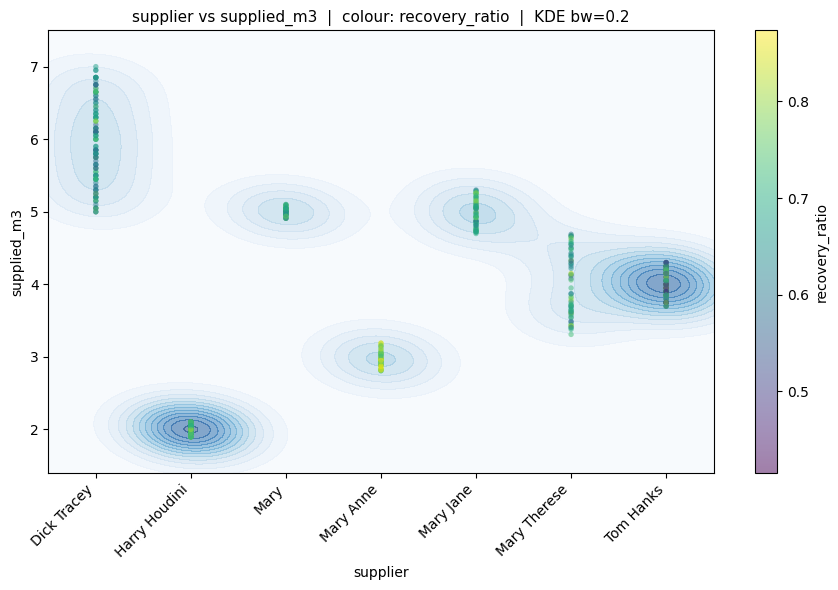

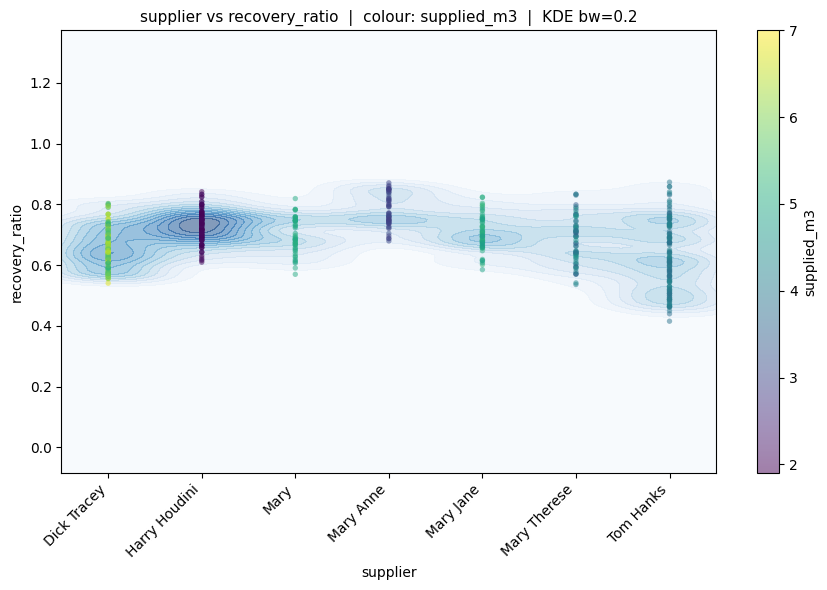

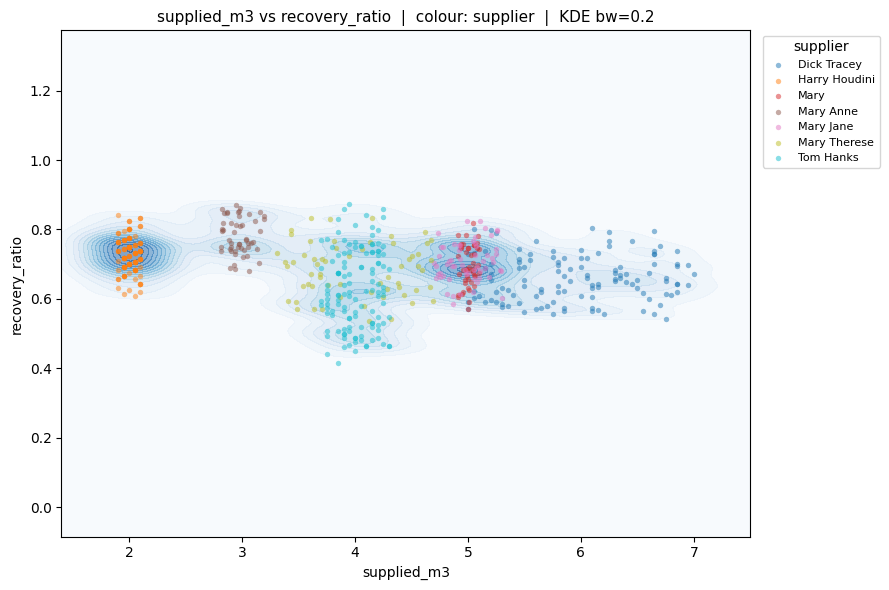

In [25]:
for x_col, y_col, target in interesting_combinations_with_supplied_m3:
    density_scatter(data_derived, x_col, y_col, target, bw = 0.2, alpha=0.5)

In [26]:
from statistical_comparision import analyze_condition_impact, compare_two_conditions, print_impact_summary, compare_two_columns, visualise_impact_summary


In [27]:
# Compare one supplier vs all others
results = analyze_condition_impact(data_derived, "supplier", "Mary")
#print_impact_summary(results)

# Compare two specific suppliers
results = compare_two_conditions(data_derived, "supplier", "Mary", "Mary Anne")
print_impact_summary(results, alpha=0.9)

SIGNIFICANT FINDINGS (p < 0.9): 8/10

Column: supplied_m3
  Test: mann_whitney_u, p-value: 0.0000000000
  Effect size: 1.000 (large)
  Suggested viz: boxplot

Column: recovered_m3
  Test: mann_whitney_u, p-value: 0.0000000000
  Effect size: 1.000 (large)
  Suggested viz: boxplot

Column: recovery_ratio
  Test: mann_whitney_u, p-value: 0.0000000027
  Effect size: -0.699 (large)
  Suggested viz: boxplot

Column: process_time_mins
  Test: mann_whitney_u, p-value: 0.0000001698
  Effect size: 0.614 (large)
  Suggested viz: boxplot

Column: time_start_hour_minute
  Test: mann_whitney_u, p-value: 0.2986295677
  Effect size: -0.122 (small)
  Suggested viz: boxplot

Column: time_end
  Test: chi_square, p-value: 0.4524803890
  Effect size: 1.000 (large)
  Suggested viz: stacked_bar

Column: time_start
  Test: mann_whitney_u, p-value: 0.8170403006
  Effect size: -0.028 (small)
  Suggested viz: boxplot

Column: date
  Test: chi_square, p-value: 0.8234094029
  Effect size: 0.637 (large)
  Suggested

ALL FINDINGS: 1 columns analyzed

Column: N/A
  Test: spearman_correlation, p-value: 0.0000000000
  Effect size: -0.290 (small)
  Suggested viz: scatter



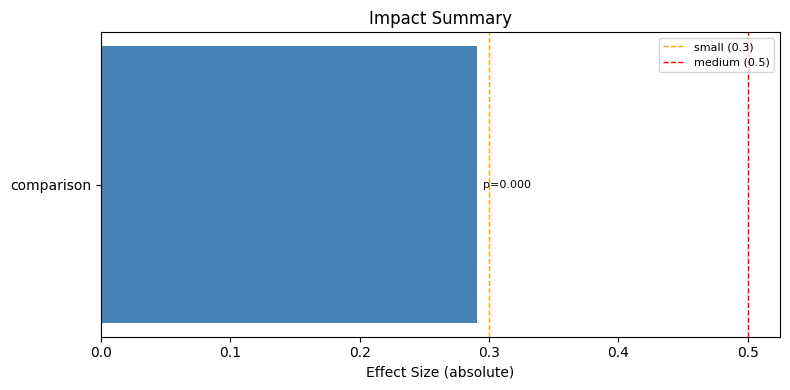

ALL FINDINGS: 1 columns analyzed

Column: N/A
  Test: spearman_correlation, p-value: 0.0000000000
  Effect size: -0.290 (small)
  Suggested viz: scatter



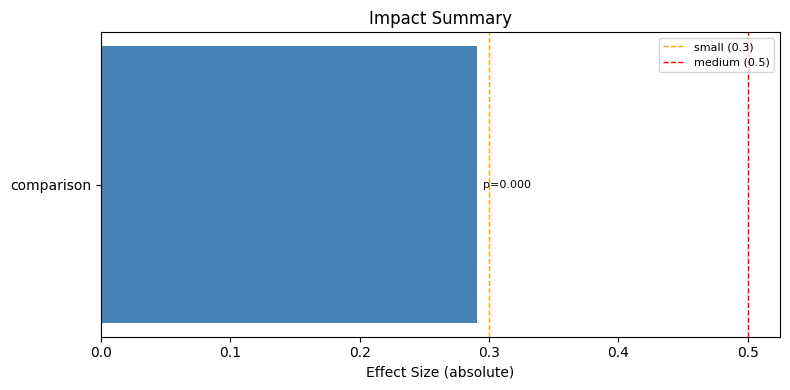

In [28]:
results = compare_two_columns(data_derived, "supplied_m3", "recovery_ratio")
print_impact_summary(results)
visualise_impact_summary(results)
results = compare_two_columns(data_derived, "supplied_m3", "recovery_ratio")
print_impact_summary(results)
visualise_impact_summary(results)